In [1]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from xailib.data_loaders.dataframe_loader import prepare_dataframe
from xailib.explainers.lime_explainer import LimeXAITabularExplainer
from xailib.explainers.lore_explainer import LoreTabularExplainer
from xailib.explainers.shap_explainer_tab import ShapXAITabularExplainer
from xailib.models.sklearn_classifier_wrapper import sklearn_classifier_wrapper

In [3]:
df=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/BIN√ÅRIO_HRV.csv')
df_sem_coluna = df.drop(columns=["IAH","F","M"])
df_sem_coluna.to_csv('BIN√ÅRIO_FINAL.csv', index=False)

In [4]:
source_file = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplica√ß√µes Biblioteca LORE/BIN√ÅRIO_FINAL.csv'
class_field = 'CLASSE'
dfLORE = pd.read_csv(source_file, skipinitialspace=True, na_values='?', keep_default_na=True)

In [5]:
dfLORE, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = prepare_dataframe(dfLORE, class_field)
dfLORE

T90  SATMIN  IDADE    ALTURA        PESO        IMC      PIP       W0  \
0     0.03      87     35  1.660000   69.600000  25.257657  49.5922   4.0768   
1     0.00      92     50  1.590000   98.700000  39.041177  48.4985   6.3788   
2     0.00      92     27  1.800000   91.000000  28.086420  51.0391  14.4829   
3     1.37      41     61  1.590000  103.700000  41.018947  60.8169   5.6235   
4     0.07      88     26  1.649234   59.700000  21.948760  47.7805   1.4780   
..     ...     ...    ...       ...         ...        ...      ...      ...   
286  34.30      69     63  1.620000   89.500000  34.103033  54.1595  13.1081   
287  68.40      67     64  1.640000  127.000000  47.218917  64.2736   1.0004   
288   1.80      82     51  1.650000   94.200000  34.600551  48.8423   9.6049   
289   4.60      83     59  1.649234   89.262007  32.817260  62.6354   5.1821   
290  85.80      50     58  1.560000  116.000000  47.666009  55.9210   9.5483   

          W1       W2  ...  PHASEEN       AC       DC   PORTAS   GUZIKS  \
0    48.3943  42.1703  ...   0.9303 -11.9732  10.4526  46.6220  47.8699   
1    52.1003  31.1333  ...   0.9348  -6.3287   6.1144  49.2434  48.9933   
2    30.6881  42.0710  ...   0.9239 -13.4549  14.9428  52.3657  57.2754   
3    20.4419  59.7282  ...   0.9101 -14.5812  14.4796  50.0457  50.2848   
4    55.0176  42.2484  ...   0.8909 -29.3785  35.4046  54.5368  56.3937   
..       ...      ...  ...      ...      ...      ...      ...      ...   
286  30.2523  37.5912  ...   0.9178 -11.6846  10.8219  47.8445  48.0653   
287  23.7305  56.6400  ...   0.8764  -5.2141   7.1196  57.4381  57.5743   
288  43.5728  37.5027  ...   0.9269 -19.3183  21.7097  52.3061  56.6817   
289  26.5503  43.4533  ...   0.8945  -3.5383   4.1281  52.1756  53.5385   
290  26.1508  51.3099  ...   0.9226 -17.3400  19.8391  52.8603  53.0188   

     EHLERS    BIN0V    BIN1V    BIN2V  CLASSE  
0   -0.2132  17.2253  68.7786  13.9962       1  
1   -0.1273  24.8110  60.5646  14.6244       1  
2    2.4017  27.1533  51.4026  21.4442       1  
3    0.0960  11.2946  58.4855  30.2198       1  
4    1.4414  12.7135  79.9516   7.3349       1  
..      ...      ...      ...      ...     ...  
286 -0.2136  31.9158  46.3412  21.7430       0  
287  1.4235   9.6522  61.7281  28.6197       0  
288  2.0795  24.6303  59.7656  15.6041       0  
289  0.7252  21.7171  52.3949  25.8880       0  
290  0.6943  19.8313  55.8353  24.3334       0  

[291 rows x 41 columns]

In [7]:
dfLORE['CLASSE'].value_counts()

CLASSE
0    181
1    110
Name: count, dtype: int64

In [6]:
#separando conjunto de teste e de treino
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfLORE, test_size=0.3, random_state=42)

In [7]:
train_set.iloc[:, 0:40]

T90  SATMIN  IDADE  ALTURA   PESO        IMC      PIP       W0  \
258  23.60      75     67    1.61   76.0  29.319856  75.0727   4.2549   
86   14.40      81     51    1.52   48.0  20.775623  69.9003   1.7170   
229  10.80      77     70    1.64   69.0  25.654372  50.9938  12.7780   
92    0.20      87     36    1.69   74.0  25.909457  54.0109   3.0068   
97    1.40      83     27    1.55   70.0  29.136316  50.3281   5.6408   
..     ...     ...    ...     ...    ...        ...      ...      ...   
188  18.39      49     32    1.60  123.7  48.320312  52.5720   8.5143   
71   18.70      73     56    1.56   85.0  34.927679  61.2185   3.0387   
106   0.70      79     47    1.48   70.0  31.957633  58.2807   2.5312   
270  99.70      53     40    1.85  188.0  54.930606  61.2457   4.1517   
102  99.70      75     74    1.68   93.0  32.950680  74.1466   1.2692   

          W1       W2  ...   ATTEN  PHASEEN       AC       DC   PORTAS  \
258  11.3053  39.4062  ...  2.3475   0.6924  -1.2289   1.3699  51.0043   
86   10.4227  64.2845  ...  1.4629   0.8812  -7.1137   6.5278  47.4961   
229  34.7683  39.3050  ...  2.6883   0.9105  -9.6844   9.9350  51.1953   
92   41.3305  46.3030  ...  1.9035   0.9189 -11.9485  10.7005  48.5700   
97   50.0402  32.0461  ...  2.3812   0.9162  -6.2342   8.9840  51.3459   
..       ...      ...  ...     ...      ...      ...      ...      ...   
188  39.1033  38.5719  ...  2.4293   0.9233  -9.0357   8.4255  48.2910   
71   20.9251  65.3840  ...  1.6233   0.9141 -11.6971  11.4989  49.8138   
106  33.7759  50.0790  ...  1.9538   0.9216  -7.9992   7.7740  52.0880   
270  27.5211  48.8306  ...  2.0666   0.9033  -5.0520   5.8209  52.2840   
102  10.2672  53.2601  ...  1.6841   0.8706  -2.5366   3.6157  54.8450   

      GUZIKS  EHLERS    BIN0V    BIN1V    BIN2V  
258  51.3277  0.2126  23.9461  42.7151  33.3388  
86   46.7781 -0.5562   5.5659  56.1571  38.2771  
229  50.8643  0.1930  31.9211  52.4566  15.6223  
92   51.0898  0.2328  16.2400  69.8136  13.9465  
97   52.4776  0.4417  29.3564  58.4494  12.1942  
..       ...     ...      ...      ...      ...  
188  49.9403 -0.0504  25.6497  54.3417  20.0087  
71   51.2127  0.4347   9.1912  67.6111  23.1977  
106  53.6257  0.7734  13.8376  66.4834  19.6790  
270  52.9548  0.4492  16.9553  61.9908  21.0539  
102  57.9662  1.9637   8.5135  51.1470  40.3395  

[203 rows x 40 columns]

In [8]:
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling
smote = SMOTE(random_state=7)
from sklearn.impute import IterativeImputer as imputer
X_T, y_T = smote.fit_resample(train_set.iloc[:, 0:40], train_set['CLASSE'],)
from collections import Counter
print(y_T.value_counts())

CLASSE
0    129
1    129
Name: count, dtype: int64


In [9]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=7)
RF.fit(X_T,y_T)

RandomForestClassifier(random_state=7)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_t = test_set['CLASSE'].copy()
X_t = test_set.iloc[:, 0:40].copy()
print(y_t.value_counts())
predict=RF.predict(X_t)
accuracy_score(predict,y_t)

CLASSE
0    52
1    36
Name: count, dtype: int64


0.7272727272727273

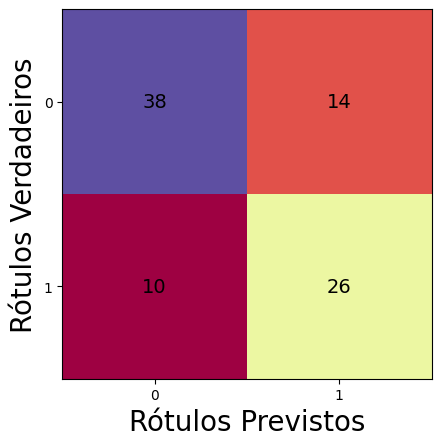

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y_t)
conf_matrix = confusion_matrix(y_t, predict, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('R√≥tulos Previstos', fontsize=20)
plt.ylabel('R√≥tulos Verdadeiros', fontsize=20)
plt.show()

In [12]:
bbox = sklearn_classifier_wrapper(RF)

In [13]:
source_file = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplica√ß√µes Biblioteca LORE/HRVover.csv'
class_field = 'CLASSE'

In [14]:
inst√¢ncia = X_t.iloc[3].values
inst√¢ncia.reshape(1, -1)
print('Instance ',inst√¢ncia)
print('True class ', y_t.iloc[3])
print('Predicted class ', predict[3])

Instance  [ 9.20000000e+00  7.00000000e+01  6.50000000e+01  1.65000000e+00
  1.22000000e+02  4.48117539e+01  5.99173000e+01  1.75890000e+00
  2.82187000e+01  5.85742000e+01  1.14482000e+01  1.89472000e+01
  4.84871000e+01  8.31590000e+00  2.42498000e+01  3.83835500e+02
  1.53870600e+02  2.42811500e+02  3.87623000e+01  6.12377000e+01
  6.87300000e-01  8.50868300e+02  3.76630000e+01  2.73505000e+01
  1.07080000e+00  1.94190000e+00  1.76710000e+00  5.95200000e-01
  2.52090000e+00  4.69820000e+00  1.64490000e+00  9.06200000e-01
 -9.57790000e+00  6.89270000e+00  4.80135000e+01  4.84821000e+01
 -1.61400000e-01  9.41930000e+00  6.85894000e+01  2.19913000e+01]
True class  0
Predicted class  0


# 0 √â APNEICO E 1 √â NORMAL

In [15]:
import time
inicio = time.time()

explainer = LoreTabularExplainer(bbox)
config = {'neigh_type':'rndgen', 'size':1000, 'ocr':0.1, 'ngen':10}
explainer.fit(dfLORE, class_field, config)
exp = explainer.explain(inst√¢ncia)
exp.plotRules()
exp.plotCounterfactualRules()

fim = time.time()
print(f"‚è±Ô∏è Tempo de execu√ß√£o: {fim - inicio:.4f} segundos")

‚è±Ô∏è Tempo de execu√ß√£o: 52.8432 segundos


In [2]:
exp_dict_exemple=exp.expDict
#print(exp_dict_exemple)

## GERANDO AS EXPLICA√á√ïES E O BANCO DE DADOS COM TODAS AS INST√ÇNCIAS CLASSIFICADAS CORRETAMENTE E SALVANDO UM ARQUIVO txt. CONTENDO DICION√ÅRIOS COM AS EXPLICA√á√ïES DE CADA INST√ÇNCIA PARA POSTERIOR ACESSO E UTILIZA√á√ÉO EM DIFERENTES ESTAT√çSTICAS
O C√ìDIGO TAMB√âM J√Å REALIZA A CONTAGEM DOS PAR√ÇMETROS QUE MAIS APARECEM NAS EXPLICA√á√ïES

In [17]:
y_series = pd.Series(y_t, index=X_t.index)  
y_pred_series = pd.Series(predict, index=X_t.index)  

#Criando uma m√°scara de erro alinhada com o √≠ndice de X
mask_acertos = y_series == y_pred_series  

#Selecionando as inst√¢ncias mal classificadas
df_acertos = X_t.loc[mask_acertos].copy()  

#Adicionando as classes real e prevista ao DataFrame de erros
df_acertos['Classe_Real'] = y_series[mask_acertos].values
df_acertos['Classe_Prevista'] = y_pred_series[mask_acertos].values

#Removendo os dados artificiais
df_acertos = df_acertos[df_acertos.index <= 290]
print(df_acertos.shape)
df_acertos.head()

(64, 42)


T90  SATMIN  IDADE    ALTURA        PESO        IMC      PIP       W0  \
259   2.4      85     54  1.560000   77.300000  31.763642  59.7655   5.2408   
45    2.0      82     53  1.640000   65.000000  24.167162  58.2716   5.4463   
176   9.2      70     65  1.650000  122.000000  44.811754  59.9173   1.7589   
143   0.0      91     66  1.649234   89.262007  32.817260  47.7825  24.3318   
125  98.4      64     68  1.500000   55.000000  24.444444  46.5864  18.1349   

          W1       W2  ...      AC       DC   PORTAS   GUZIKS  EHLERS  \
259  30.7866  43.3670  ... -6.0373   6.1587  50.8726  51.4137  0.4595   
45   29.4046  50.0357  ... -7.5442   7.9502  51.4894  51.6891  0.4140   
176  28.2187  58.5742  ... -9.5779   6.8927  48.0135  48.4821 -0.1614   
143  26.6360  30.5093  ... -7.1254  10.2476  57.5344  61.9283  3.2136   
125  36.0288  33.7538  ... -8.2082   8.2682  50.3578  51.5395  0.4637   

       BIN0V    BIN1V    BIN2V  Classe_Real  Classe_Prevista  
259  23.5269  56.0213  20.4518            0                0  
45   17.6156  60.0317  22.3527            1                1  
176   9.4193  68.5894  21.9913            0                0  
143  44.2501  35.7581  19.9918            0                0  
125  40.2026  47.4331  12.3644            0                0  

[5 rows x 42 columns]

In [18]:
import os
#Criar uma pasta para salvar as explica√ß√µes
os.makedirs("explicacoes_LORE_binary_dict", exist_ok=True)

In [19]:
from collections import Counter
import time  
tempo_total_inicio = time.time()  #In√≠cio do tempo total

In [28]:
todos_os_atributos = []
for idx, row in df_acertos.iterrows():
    tempo_inicio = time.time()  #In√≠cio do tempo da itera√ß√£o
    print(f"\nExplicando inst√¢ncia {idx}...")

    #Pegando os valores da inst√¢ncia e a classe real/predita
    instancia = row.drop(['Classe_Real', 'Classe_Prevista']).values
    classe_real = row['Classe_Real']
    classe_predita = row['Classe_Prevista']

    print('Instance:', instancia)
    print('True class:', classe_real)
    print('Predicted class:', classe_predita)

    #Criando o explicador LORE
    explainer = LoreTabularExplainer(bbox)

    #Configura√ß√£o do LORE
    config = {'neigh_type': 'rndgen', 'size': 1000, 'ocr': 0.1, 'ngen': 10}

    #Treinando o explicador
    explainer.fit(dfLORE, class_field, config)

    #Gerando a explica√ß√£o
    exp = explainer.explain(instancia)
    exp_dict = exp.expDict['rule']
    premises = exp_dict['premise']

    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']
    print('Fidelidade', exp_pred['fidelity'])
    print('Previs√£o do black-box',bb_pred, 'Previs√£o da decision tree', dt_pred)
    
    attributes = [premise['att'] for premise in premises]
    todos_os_atributos.extend(attributes)
    
    for premise in premises:
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condi√ß√£o
        print(f"Condi√ß√£o: {att} {op} {thr}")
    
    with open(f"explicacoes_LORE_binary_dict/explicacao_{idx}.txt", "w") as f:
        f.write(str(exp_dict))

    tempo_fim = time.time()  # Fim do tempo da itera√ß√£o
    print(f"\n‚è±Ô∏è Tempo de execu√ß√£o da explica√ß√£o: {tempo_fim - tempo_inicio:.2f} segundos")

tempo_total_fim = time.time()  # Fim do tempo total
print(f"\n‚úÖ Tempo total de execu√ß√£o: {tempo_total_fim - tempo_total_inicio:.2f} segundos")

#Ap√≥s todas as itera√ß√µes, contar a frequ√™ncia dos atributos
attribute_counts = Counter(todos_os_atributos)

#Convertendo a contagem para um DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequ√™ncia'])
#Ordenando em ordem decrescente pela frequ√™ncia
attribute_counts_df = attribute_counts_df.sort_values(by='Frequ√™ncia', ascending=False)
#Salvando o DataFrame em um arquivo CSV
attribute_counts_df.to_csv('atributos_contagem_binary.csv', index=False)

#Exibindo o DataFrame ordenado
print("\nüîπ Frequ√™ncia dos Atributos (ordenados):")
print(attribute_counts_df)

print("\nüîπ Frequ√™ncia dos Atributos:")
for att, count in attribute_counts.items():
    print(f"Atributo: {att}, Frequ√™ncia: {count}")


Explicando inst√¢ncia 259...
Instance: [ 2.40000000e+00  8.50000000e+01  5.40000000e+01  1.56000000e+00
  7.73000000e+01  3.17636423e+01  5.97655000e+01  5.24080000e+00
  3.07866000e+01  4.33670000e+01  2.06056000e+01  5.15640000e+01
  3.86325000e+01  1.32990000e+00  8.47370000e+00  2.68616900e+02
  1.42475200e+02  6.98065000e+01  6.40519000e+01  3.59481000e+01
  2.20510000e+00  8.42049400e+02  3.01544000e+01  1.35175000e+01
  1.36700000e+00  1.77800000e+00  1.24720000e+00  5.31200000e-01
  2.48860000e+00  3.98620000e+00  2.38050000e+00  9.06200000e-01
 -6.03730000e+00  6.15870000e+00  5.08726000e+01  5.14137000e+01
  4.59500000e-01  2.35269000e+01  5.60213000e+01  2.04518000e+01]
True class: 0.0
Predicted class: 0.0
Fidelidade 0.9773841171707115
Previs√£o do black-box 0 Previs√£o da decision tree 0
Condi√ß√£o: T90 <= 2.5
Condi√ß√£o: W0 <= 6.699324369430542
Condi√ß√£o: VLFABS <= 588.1054382324219
Condi√ß√£o: BIN1V > 50.187599182128906
Condi√ß√£o: AC <= 3.284270763397217
Condi√ß√£o: SA

In [29]:
count_acertos = pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplica√ß√µes Biblioteca LORE/binary_csv/atributos_contagem_binary.csv')
count_acertos.head(10)

Atributo  Frequ√™ncia
0      T90          51
1   VLFABS          43
2     PESO          38
3   SAMPEN          33
4        M          26
5   SATMIN          26
6      IMC          23
7    LFABS          23
8    BIN0V          19
9   DISPEN          19

## GERANDO AS EXPLICA√á√ïES DE TODAS AS INST√ÇNCIAS CLASSIFICADAS INCORRETAMENTE E SALVANDO UM ARQUIVO txt. CONTENDO DICION√ÅRIOS COM AS EXPLICA√á√ïES DE CADA INST√ÇNCIA PARA POSTERIOR ACESSO E UTILIZA√á√ÉO EM DIFERENTES ESTAT√çSTICAS
O C√ìDIGO TAMB√âM J√Å REALIZA A CONTAGEM DOS PAR√ÇMETROS QUE MAIS APARECEM NAS EXPLICA√á√ïES

In [22]:
y_series = pd.Series(y_t, index=X_t.index)  
y_pred_series = pd.Series(predict, index=X_t.index)  

#Criando uma m√°scara de erro alinhada com o √≠ndice de X
mask_erros = y_series != y_pred_series  

#Selecionando as inst√¢ncias mal classificadas
df_erros = X_t.loc[mask_erros].copy()  

#Adicionando as classes real e prevista ao DataFrame de erros
df_erros['Classe_Real'] = y_series[mask_erros].values
df_erros['Classe_Prevista'] = y_pred_series[mask_erros].values

#Removendo os dados artificiais
df_erros = df_erros[df_erros.index <= 291]
print(df_erros.shape)
df_erros

(24, 42)


T90  SATMIN  IDADE    ALTURA        PESO        IMC      PIP       W0  \
84    0.00      90     42  1.610000  108.000000  41.665059  54.4808   6.0207   
90   89.60      79     57  1.600000   94.000000  36.718750  54.4633   7.8556   
147   0.90      88     52  1.550000   68.000000  28.303850  52.1014   6.9298   
101  20.70      86     59  1.700000   92.000000  31.833910  57.9490   6.0096   
289   4.60      83     59  1.649234   89.262007  32.817260  62.6354   5.1821   
109   2.10      88     57  1.700000   81.500000  28.200692  52.9537   8.6130   
60   98.00      82     78  1.520000   50.000000  21.641274  77.6891   1.3591   
202  13.70      81     60  1.600000   71.000000  27.734375  49.5573   5.7055   
56    0.50      82     67  1.840000  108.000000  31.899811  54.8186   3.2005   
59   47.30      79     50  1.690000  140.000000  49.017892  70.0063   1.0088   
113   3.24      84     79  1.720000   68.450000  23.137507  55.0497   1.3982   
146   0.20      87     55  1.650000   66.300000  24.352617  65.1422   2.3893   
119   0.00      91     38  1.750000   84.000000  27.428571  43.3087  16.9028   
212   1.40      83     46  1.540000  120.000000  50.598752  60.3252   1.2393   
183   7.46      67     68  1.680000   81.900000  29.017857  47.6673   2.4734   
168  10.00      79     37  1.680000  115.000000  40.745465  68.7781   0.6590   
25   97.70      75     53  1.560000  100.000000  41.091387  48.9243   2.3820   
112   0.00      90     50  1.720000   81.000000  27.379665  55.7424  11.9029   
148   0.00      91     20  1.730000   89.000000  29.737044  47.8898   7.2261   
114   2.70      85     66  1.740000   94.500000  31.212842  68.0291   2.0568   
93    2.40      85     65  1.650000   70.000000  25.711662  51.9238   2.2666   
16    5.40      83     30  1.660000  102.100000  37.051822  49.8926   3.1941   
111   0.66      77     38  1.710000  112.000000  38.302384  58.8936   1.8790   
152   0.00      89     71  1.550000   68.000000  28.303850  49.7488  12.1526   

          W1       W2  ...       AC       DC   PORTAS   GUZIKS    EHLERS  \
84   38.3577  41.8240  ...  -6.1145   6.4501  51.3422  52.2414  0.429700   
90   38.4967  36.0125  ...  -6.2748   4.3010  46.0335  42.3945 -1.331100   
147  43.7267  35.4601  ...  -8.9557   5.7432  52.0487  52.0334  0.342200   
101  28.7467  50.5872  ...  -8.0870   8.2654  49.9237  49.6764 -0.060900   
289  26.5503  43.4533  ...  -3.5383   4.1281  52.1756  53.5385  0.725200   
109  38.0128  39.2201  ...  -7.2597   9.6471  51.2069  51.4646  0.560800   
60   10.4249  41.9608  ...  -1.3796   1.4332  50.4287  50.2386  0.014400   
202  50.1234  33.9795  ... -12.8196  13.6393  51.7376  52.7170  0.616900   
56   39.4060  47.0367  ... -10.4947  10.3078  49.1783  49.7800 -0.009496   
59   19.3175  48.3675  ...  -2.2113   4.3858  62.3490  62.9622  2.059400   
113  37.7007  55.2231  ...  -6.7322   7.0738  51.2193  51.6504  0.298000   
146  15.3315  66.7592  ... -10.7990  11.8201  52.5532  52.4734  0.561500   
119  45.6152  28.1319  ...  -8.2917   8.9841  52.3959  53.5015  0.832200   
212  32.1718  50.9657  ...  -7.5128   7.1605  49.7053  48.8496 -0.267200   
183  53.0388  43.4007  ... -16.2129  15.8957  49.9177  51.1690  0.246700   
168  16.8776  57.9558  ...  -4.4875   2.2098  46.4204  46.2836 -0.556400   
25   51.5123  43.0675  ... -20.2503  15.9919  44.3835  43.2245 -1.273900   
112  29.4683  38.1285  ...  -5.2119   4.6824  47.5965  45.3717 -1.110400   
148  49.3027  35.9655  ... -10.8664  15.4698  55.3380  55.7987  0.995400   
114  16.1068  57.6184  ... -13.6496  14.1641  51.1006  51.7665  0.528500   
93   45.3930  46.6152  ... -16.5310  15.5701  48.0259  47.6929 -0.279200   
16   50.6341  39.5485  ...  -8.8374  10.0753  51.8063  52.1008  0.402600   
111  22.8335  72.0267  ... -12.1727  10.6368  46.8407  47.1754 -0.422200   
152  40.9029  32.5342  ...  -6.2331   9.2372  50.1037  50.3292  0.127400   

       BIN0V    BIN1V    BIN2V  Classe_Real  Classe_Prevista  
84   27.6741  59.3422  12.9837            

In [23]:
import os
# Criar uma pasta para salvar as explica√ß√µes
os.makedirs("explicacoes_LORE_binary_dict_erros", exist_ok=True)

In [24]:
todos_os_atributos = []
for idx, row in df_erros.iterrows():
    print(f"\nüîπ Explicando inst√¢ncia {idx}...")

    # Pegando os valores da inst√¢ncia e a classe real/predita
    instancia = row.drop(['Classe_Real', 'Classe_Prevista']).values
    classe_real = row['Classe_Real']
    classe_predita = row['Classe_Prevista']

    print('Instance:', instancia)
    print('True class:', classe_real)
    print('Predicted class:', classe_predita)

    # Criando o explicador LORE
    explainer = LoreTabularExplainer(bbox)

    # Configura√ß√£o do LORE
    config = {'neigh_type': 'rndgen', 'size': 1000, 'ocr': 0.1, 'ngen': 10}

    # Treinando o explicador
    explainer.fit(dfLORE, class_field, config)

    # Gerando a explica√ß√£o
    exp = explainer.explain(instancia)
    
    exp_dict = exp.expDict['rule']
    premises = exp_dict['premise']
    
    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']
    
    print('Previs√£o do black-box',bb_pred, 'Previs√£o da decision tree', dt_pred)
    print('Fidelidade', exp_pred['fidelity'])
    
    attributes = [premise['att'] for premise in premises]
    todos_os_atributos.extend(attributes)
    
    for premise in premises:
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condi√ß√£o
        print(f"Condi√ß√£o: {att} {op} {thr}")
    
    with open(f"explicacoes_LORE_binary_dict_erros/explicacao_{idx}.txt", "w") as f:
        f.write(str(exp_dict))
    with open(f"explicacoes_LORE_binary_dict_erros/predi√ß√µes_{idx}.txt", "w") as f:
        f.write(str(exp_pred))

# Ap√≥s todas as itera√ß√µes, contar a frequ√™ncia dos atributos
attribute_counts = Counter(todos_os_atributos)

# Convertendo a contagem para um DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequ√™ncia'])
# Ordenando em ordem decrescente pela frequ√™ncia
attribute_counts_df = attribute_counts_df.sort_values(by='Frequ√™ncia', ascending=False)
# Salvando o DataFrame em um arquivo CSV
attribute_counts_df.to_csv('atributos_contagem_binary_erros.csv.csv', index=False)

# Exibindo o DataFrame ordenado
print("\nüîπ Frequ√™ncia dos Atributos (ordenados):")
print(attribute_counts_df)

print("\nüîπ Frequ√™ncia dos Atributos:")
for att, count in attribute_counts.items():
    print(f"Atributo: {att}, Frequ√™ncia: {count}")



üîπ Explicando inst√¢ncia 84...
Instance: [ 0.00000000e+00  9.00000000e+01  4.20000000e+01  1.61000000e+00
  1.08000000e+02  4.16650592e+01  5.44808000e+01  6.02070000e+00
  3.83577000e+01  4.18240000e+01  1.37975000e+01  5.67664000e+01
  3.62767000e+01  1.41860000e+00  5.53820000e+00  4.45091700e+02
  1.35871100e+02  5.74757000e+01  6.69582000e+01  3.30418000e+01
  2.22870000e+00  7.43205400e+02  3.52199000e+01  1.17962000e+01
  1.46130000e+00  1.52200000e+00  1.03480000e+00  5.64700000e-01
  2.42230000e+00  3.69040000e+00  2.43210000e+00  9.08800000e-01
 -6.11450000e+00  6.45010000e+00  5.13422000e+01  5.22414000e+01
  4.29700000e-01  2.76741000e+01  5.93422000e+01  1.29837000e+01]
True class: 1.0
Predicted class: 0.0
Previs√£o do black-box 0 Previs√£o da decision tree 0
Fidelidade 0.9730555079267379
Condi√ß√£o: T90 <= 1.3399999737739563
Condi√ß√£o: SATMIN > 85.00064849853516
Condi√ß√£o: IDADE <= 50.02287673950195
Condi√ß√£o: VLFABS <= 641.1265563964844
Condi√ß√£o: DFA  <= 1.521495

In [33]:
count_erros = pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplica√ß√µes Biblioteca LORE/binary_csv/atributos_contagem_binary_erros.csv')
count_erros.head(10)
#CONDIZENTE COM O OBTIDO NO LORE InHouse SAMPEM aparece como atributo importante

Atributo  Frequ√™ncia
0      T90          24
1     PESO          24
2   VLFABS          20
3   SAMPEN          15
4   SATMIN          12
5      IMC          11
6   EHLERS          11
7     DFA            9
8   DISPEN           9
9   PORTAS           8

In [2]:
import pandas as pd

# Caminhos completos dos arquivos CSV
caminho_csv1 = "C:/Users/Gabriel/Pasta/Machine Learning/Aplica√ß√µes Biblioteca LORE/binary_csv/atributos_contagem_binary.csv"
caminho_csv2 = "C:/Users/Gabriel/Pasta/Machine Learning/Aplica√ß√µes Biblioteca LORE/binary_csv/atributos_contagem_binary_erros.csv"

# Carrega os dois arquivos CSV usando os caminhos absolutos
csv1 = pd.read_csv(caminho_csv1)
csv2 = pd.read_csv(caminho_csv2)

# Garante que as colunas tenham o mesmo nome e tipo
csv1.columns = ['atributo', 'frequencia']
csv2.columns = ['atributo', 'frequencia']

# Agrupa os dois CSVs em um √∫nico DataFrame
df_total_C = pd.concat([csv1, csv2])

# Agrupa por atributo e soma as frequ√™ncias
df_somado = df_total_C.groupby('atributo', as_index=False)['frequencia'].sum()

# Ordena pela frequ√™ncia de forma decrescente
df_ordenado = df_somado.sort_values(by='frequencia', ascending=False)

# Exibe o resultado ou salva em um novo CSV
print(df_ordenado)
# df_ordenado.to_csv("frequencias_somadas.csv", index=False)

   atributo  frequencia
36      T90          75
37   VLFABS          63
24     PESO          62
29   SAMPEN          48
30   SATMIN          38
17      IMC          34
8    DISPEN          28
21        M          27
18    LFABS          26
3     BIN0V          26
7      DFA           24
32   SYMB0V          23
16    IDADE          21
27   PORTAS          20
31     SDNN          20
38       W0          19
10   EHLERS          18
4     BIN1V          17
13   GUZIKS          17
33   SYMB1V          17
9    DISTEN          16
19     LFHF          15
2     ATTEN          15
20     LFNU          15
6        DC          14
5     BIN2V          13
41       W3          13
28    RMSSD          12
11        F          11
1    ALTURA          11
26      PIP          11
39       W1          10
35  SYMB2UV           9
40       W2           8
15     HFNU           8
22   MEANRR           7
12  FUZZYEN           7
23   PERMEN           7
34  SYMB2LV           7
25  PHASEEN           7
0        AC     

## ACESSANDO AS PASTAS COM OS DICION√ÅRIOS SALVOS EM txt. PARA DETERMINAR QUAIS S√ÉO OS PAR√ÇMETROS QUE APARECEM MAIS EM PRIMEIRO, SEGUNDO, TERCEIRO, QUARTO, E QUINTO LUGAR NAS EXPLICA√á√ïES

In [30]:
import os
import ast
from collections import Counter

# Diret√≥rio onde os arquivos est√£o salvos
diretorio = "explicacoes_LORE_binary_dict"

# Dicion√°rios para contar a frequ√™ncia de cada atributo em cada posi√ß√£o
posicao_contadores = {1: Counter(), 2: Counter(), 3: Counter(), 4:Counter(), 5:Counter()}

# Percorre todos os arquivos no diret√≥rio
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # L√™ o conte√∫do do arquivo e converte de string para dicion√°rio
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicion√°rio

    # Obt√©m a lista de premissas
    premises = exp_dict['premise']

    # Atualiza os contadores para as tr√™s primeiras posi√ß√µes
    for i in range(1, 6):  # Considera apenas as tr√™s primeiras posi√ß√µes
        if len(premises) >= i:
            att = premises[i - 1]['att']  # Pega o nome do atributo
            posicao_contadores[i][att] += 1

# Exibir os atributos mais frequentes em cada posi√ß√£o
for posicao, contador in posicao_contadores.items():
    if contador:
        atributo_mais_frequente, frequencia = contador.most_common(1)[0]
        print(f"Atributo mais frequente na posi√ß√£o {posicao}: {atributo_mais_frequente} ({frequencia} vezes)")

Atributo mais frequente na posi√ß√£o 1: T90 (49 vezes)
Atributo mais frequente na posi√ß√£o 2: VLFABS (28 vezes)
Atributo mais frequente na posi√ß√£o 3: VLFABS (20 vezes)
Atributo mais frequente na posi√ß√£o 4: VLFABS (9 vezes)
Atributo mais frequente na posi√ß√£o 5: DFA  (6 vezes)


In [32]:
import os
import ast
from collections import Counter

# Diret√≥rio onde os arquivos est√£o salvos
diretorio = "explicacoes_LORE_binary_dict_erros"

# Dicion√°rios para contar a frequ√™ncia de cada atributo em cada posi√ß√£o
posicao_contadores = {1: Counter(), 2: Counter(), 3: Counter(), 4:Counter(), 5:Counter()}

# Percorre todos os arquivos no diret√≥rio
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # L√™ o conte√∫do do arquivo e converte de string para dicion√°rio
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicion√°rio

    # Obt√©m a lista de premissas
    premises = exp_dict['premise']

    # Atualiza os contadores para as tr√™s primeiras posi√ß√µes
    for i in range(1, 6):  # Considera apenas as tr√™s primeiras posi√ß√µes
        if len(premises) >= i:
            att = premises[i - 1]['att']  # Pega o nome do atributo
            posicao_contadores[i][att] += 1

# Exibir os atributos mais frequentes em cada posi√ß√£o
for posicao, contador in posicao_contadores.items():
    if contador:
        atributo_mais_frequente, frequencia = contador.most_common(1)[0]
        print(f"Atributo mais frequente na posi√ß√£o {posicao}: {atributo_mais_frequente} ({frequencia} vezes)")

Atributo mais frequente na posi√ß√£o 1: T90 (18 vezes)
Atributo mais frequente na posi√ß√£o 2: VLFABS (12 vezes)
Atributo mais frequente na posi√ß√£o 3: VLFABS (8 vezes)
Atributo mais frequente na posi√ß√£o 4: IMC (6 vezes)
Atributo mais frequente na posi√ß√£o 5: IMC (3 vezes)
